<a href="https://colab.research.google.com/github/GaganSaini16/Diabetes_Patient_Prediction_Logistic_Regression-/blob/main/Diabetes_Patient_Prediction_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the diabetes dataset

In [92]:
df = pd.read_csv('diabetes.csv')

EDA

In [93]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [94]:
df.shape

(768, 9)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [96]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [97]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In above dataset we find that there are lot of 0's that need to be settled/modified before putting our data set into ML alogithms.

Creating Corelation Heatmap

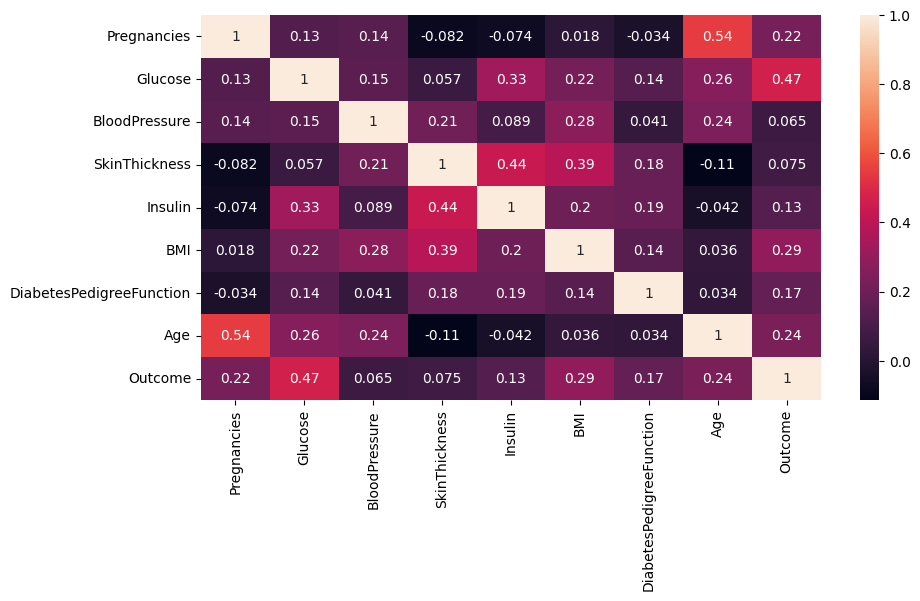

In [98]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

None of the features are highly corealted with each other, therefore all of them has to be taken into consideration.

Descriptive Stats of Dataset

In [99]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Imputation

<ipython-input-100-c4ae46efccbf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


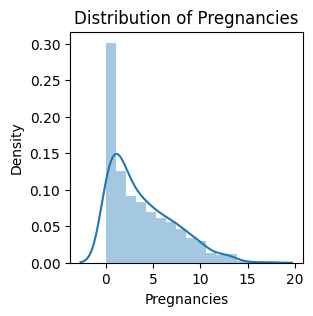

<ipython-input-100-c4ae46efccbf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


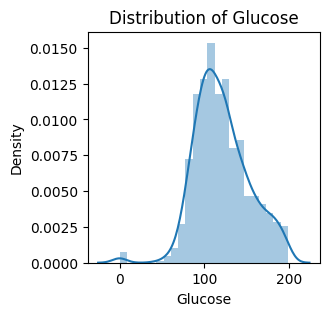

<ipython-input-100-c4ae46efccbf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


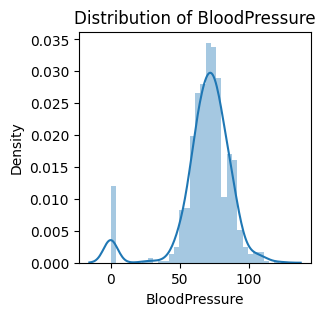

<ipython-input-100-c4ae46efccbf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


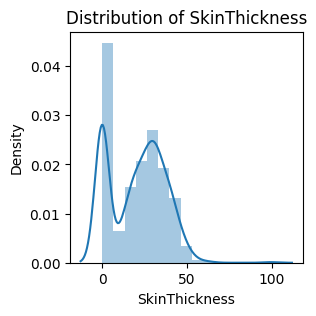

<ipython-input-100-c4ae46efccbf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


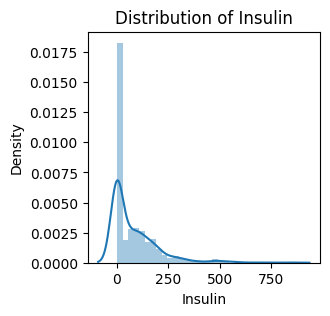

<ipython-input-100-c4ae46efccbf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


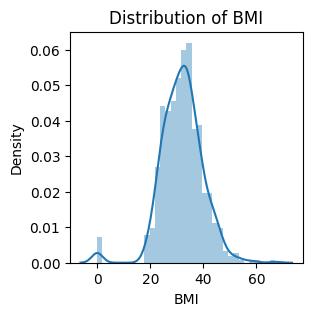

<ipython-input-100-c4ae46efccbf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


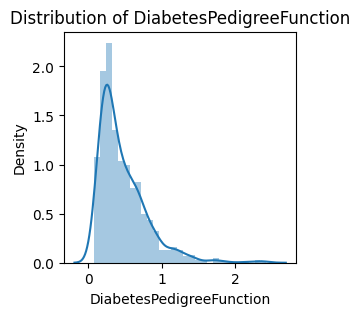

<ipython-input-100-c4ae46efccbf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


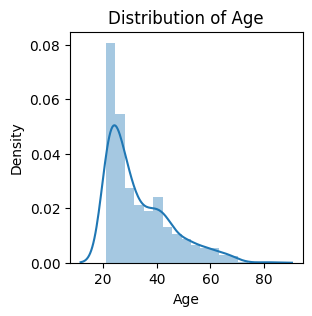

In [100]:
# Creating a distribution plot of all features to replace 0s with Mean, Median, Mode
for column in df.columns[:-1]:
  plt.figure(figsize= (3,3))  # Create a new figure for each plot
  sns.distplot(df[column])
  plt.title(f'Distribution of {column}')  # Set title for each plot
  plt.show()

# Key Findings
# Pregnancies> left skewed distribution graph> use Median
# Glucose> approx. symmetry distribution graph> use Mean
# Blood Pressure> approx. symmetry distribution graph> use Mean
# Skin Thickness> left skewed distribution graph> use Median
# Insulin> left skewed distribution graph> use Median
# BMI> approx.symmetry distribution graph> use Mean
# PedigreeFunction & Age> Not Required

In [101]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [102]:
# Replacing 0's with Mean or Median

df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [103]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1


Outlier Detection>- Box Plot

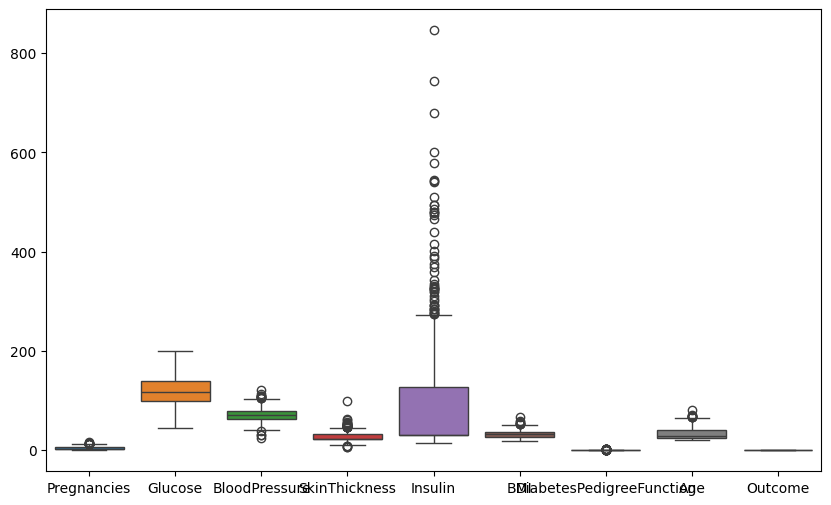

In [104]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = df, ax = ax)
plt.show()

In [105]:
# Getting the data after removing Outliers excluding the Outcome column
cols= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_wiskers = Q3 + 1.5 * IQR
  lower_wiskers = Q1 - 1.5 * IQR
  df_no_outliers = df[(df[col] >= lower_wiskers) & (df[col] <= upper_wiskers)]

# All outliers will not be removed through any case, we are just reducing there counts but some no. outliers are also important to have in dataset to make our model robust.

In [106]:
# Deviding the dataset into features and Label dataset
# X = Features; Y = Label

X = df_no_outliers.drop('Outcome', axis=1)
Y = df_no_outliers['Outcome']

Standardization

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Further removing the outliers using Quantiles

In [108]:
type(X_scaled)

numpy.ndarray

In [109]:
# X_scaled is an numpy array
# Adding column names to X_scaled and converting it into dataframe to create a boxplot and to analyse
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

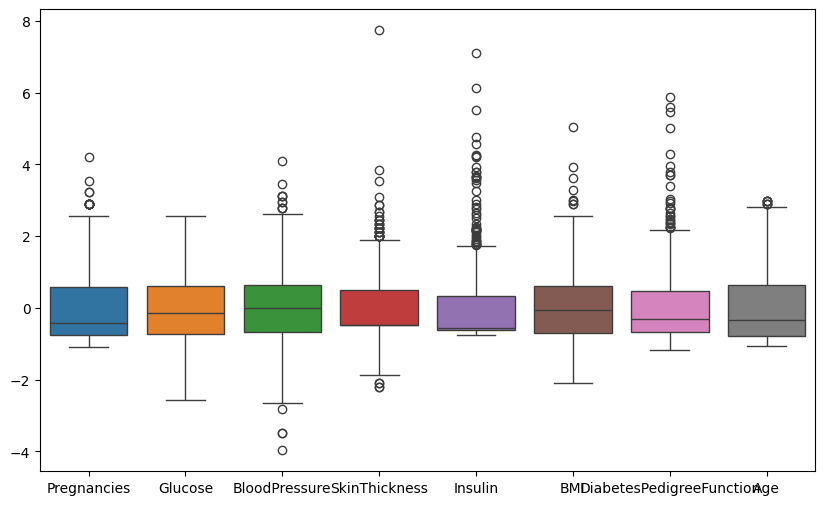

In [110]:
# Making boxplot
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = X_scaled_df, ax = ax)
plt.show()

# Still having the outliers

In [111]:
# Again combining X & Y dataset, to remove futher outliers

# Resetting the index of X_scaled_df and Y
X_scaled_df = X_scaled_df.reset_index(drop=True)
Y = Y.reset_index(drop=True)

# Now concatenate
scaled_df = pd.concat([X_scaled_df, Y], axis=1)



In [112]:
# Insulin, Skin Thickness , and DiabetesPedigreeFunction has lot of outliers
# Removing outliers by removing data points above a particular quantile, depending on each column

# Outliers reduction for Insulin feature, Used quantile == 90%
q = scaled_df['Insulin'].quantile(0.90)
new_df = scaled_df[scaled_df['Insulin'] < q]

# Outliers reduction for Skin Thickness feature, Used quantile == 95%
q = new_df['SkinThickness'].quantile(0.95)
new_df = new_df[new_df['SkinThickness'] < q]

# Outliers reduction for Pedigree Function feature, Used quantile == 95%
q = new_df['DiabetesPedigreeFunction'].quantile(0.95)
new_df = new_df[new_df['DiabetesPedigreeFunction'] < q]


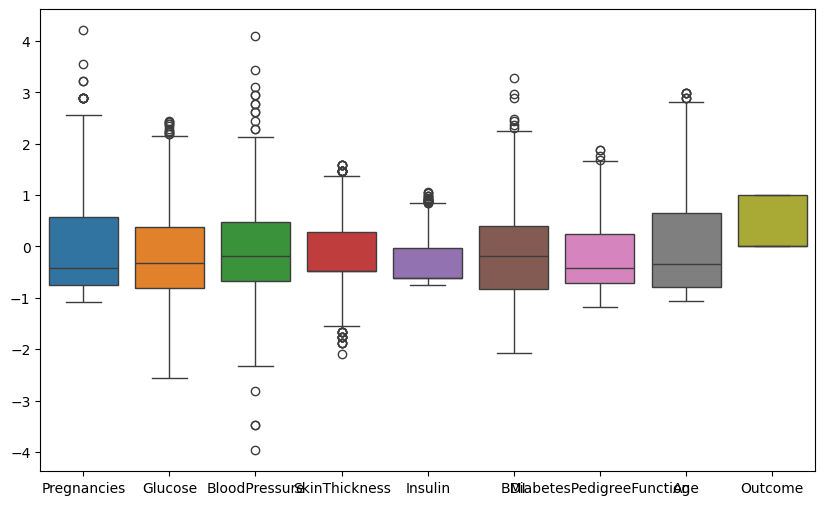

In [113]:
# Making boxplot
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = new_df, ax = ax)
plt.show()

# Now the no. of Ouliers has reduced. But also approx. 120 rows are also reduced into our dataset

In [114]:
# Now dividing the data into Features and label again to train our model

X_new_df = new_df.drop('Outcome', axis=1)
Y_new_df = new_df['Outcome']


Spliting data into Training & Testing set

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new_df, Y_new_df, test_size=0.2, random_state=42)

In [117]:
Y_train.value_counts()

# There is data imbalancing in the training data is no. of samples with 0 is greater than the 1's.

,count
Outcome,
0,337
1,151


Handling Data Imbalancing using SMOTE technique

In [118]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [119]:
Y_train_smote.value_counts()

# Now the test data is balanced.

,count
Outcome,
0,337
1,337


Training Data on Logistic Regression Model

In [120]:
from sklearn.linear_model import LogisticRegression
Regression = LogisticRegression()
Regression.fit(X_train_smote, Y_train_smote)

LogisticRegression()

Model Prediction

In [122]:
y_pred = Regression.predict(X_test)

Model Evaluation


In [123]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(Y_test, y_pred)

0.7950819672131147

In [127]:
# Confusion Matrix
print(confusion_matrix(Y_test, y_pred))

[[71 14]
 [11 26]]


In [126]:
# Classification Report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        85
           1       0.65      0.70      0.68        37

    accuracy                           0.80       122
   macro avg       0.76      0.77      0.76       122
weighted avg       0.80      0.80      0.80       122

